<a href="https://colab.research.google.com/github/RAFS20/AI-and-Finance/blob/main/Corporate_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cuaderno de: Ricardo Alonzo Fernández Salguero

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Datos trimestrales desde 2000 hasta 2024 con variaciones no lineales
data = {
    'Year': np.arange(2000, 2025),
    'Q1': [120, 135, 170, 210, 250, 300, 360, 430, 510, 600, 700, 810, 930, 1060, 1200, 1350, 1510, 1680, 1860, 2050, 2250, 2460, 2680, 2910, 3150],
    'Q2': [130, 150, 180, 220, 270, 330, 400, 480, 570, 670, 780, 900, 1030, 1170, 1320, 1480, 1650, 1830, 2020, 2220, 2430, 2650, 2880, 3120, 3370],
    'Q3': [140, 160, 190, 230, 280, 340, 410, 490, 580, 680, 790, 910, 1040, 1180, 1330, 1490, 1660, 1840, 2030, 2230, 2440, 2660, 2890, 3130, 3380],
    'Q4': [150, 170, 200, 240, 290, 350, 420, 500, 590, 690, 800, 920, 1050, 1190, 1340, 1500, 1670, 1850, 2040, 2240, 2450, 2670, 2900, 3140, 3390]
}

df = pd.DataFrame(data)

# Transformar el DataFrame para tener una entrada por trimestre
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
df_long = pd.melt(df, id_vars=['Year'], value_vars=quarters, var_name='Quarter', value_name='Value')

# Añadir número de trimestre
df_long['Quarter_Num'] = df_long['Quarter'].apply(lambda x: int(x[1]))

# Crear una columna de fecha ficticia
df_long['Date'] = df_long.apply(lambda row: pd.Timestamp(f"{row['Year']}-{(quarters.index(row['Quarter']) + 1) * 3}-01"), axis=1)

# Separar los datos en entrenamiento y prueba basados en los últimos 3 años
cutoff_date = pd.to_datetime('2022-01-01')
train = df_long[df_long['Date'] < cutoff_date]
test = df_long[df_long['Date'] >= cutoff_date]

# Crear variables para los modelos
X_train = train[['Year', 'Quarter_Num']]
y_train = train['Value']
X_test = test[['Year', 'Quarter_Num']]
y_test = test['Value']

# Inicializar los modelos
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}

# Entrenar y evaluar los modelos
mae_scores = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores[name] = mae
    predictions[name] = y_pred

# Seleccionar el mejor modelo
best_model_name = min(mae_scores, key=mae_scores.get)
best_model = models[best_model_name]

# Predecir los flujos de efectivo para todos los trimestres de 2025
X_future = pd.DataFrame({'Year': [2025] * 4, 'Quarter_Num': [1, 2, 3, 4]})
predictions_2025 = best_model.predict(X_future)

# Imprimir resultados de todos los modelos
for name, mae in mae_scores.items():
    print(f"Modelo: {name} con MAE: {mae:.2f}")

# Imprimir resultados del mejor modelo para 2025
print(f"\nMejor modelo: {best_model_name}")
for quarter, prediction in zip(['Q1', 'Q2', 'Q3', 'Q4'], predictions_2025):
    print(f"Predicción para {quarter} de 2025: {prediction:.2f}")

Modelo: Linear Regression con MAE: 581.82
Modelo: K-Nearest Neighbors con MAE: 532.33
Modelo: Random Forest con MAE: 476.03
Modelo: Gradient Boosting con MAE: 468.82
Modelo: Support Vector Regression con MAE: 2273.33

Mejor modelo: Gradient Boosting
Predicción para Q1 de 2025: 2459.84
Predicción para Q2 de 2025: 2649.48
Predicción para Q3 de 2025: 2659.63
Predicción para Q4 de 2025: 2669.13


In [22]:
pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 37.0 MB/s eta 0:00:00


In [24]:
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, value

# Datos
productos = ['A', 'B', 'C']
costos_pedido = {'A': 100, 'B': 150, 'C': 200}
costos_almacenamiento = {'A': 2, 'B': 1.5, 'C': 3}
demanda = {'A': 500, 'B': 300, 'C': 200}

# Definir el problema de optimización
modelo = LpProblem("Minimizar_Costos_Inventario", LpMinimize)

# Variables de decisión
cantidades_pedido = LpVariable.dicts("Cantidad_Pedido", productos, lowBound=0, cat='Integer')

# Función objetivo
modelo += lpSum(costos_pedido[i] * cantidades_pedido[i] + costos_almacenamiento[i] * cantidades_pedido[i] for i in productos)

# Restricciones
for i in productos:
    modelo += cantidades_pedido[i] >= demanda[i]

# Resolver el problema
modelo.solve()

# Resultados
for v in modelo.variables():
    print(f"{v.name} = {v.varValue}")

print(f"Coste Total = {value(modelo.objective)}")



Cantidad_Pedido_A = 500.0
Cantidad_Pedido_B = 300.0
Cantidad_Pedido_C = 200.0
Coste Total = 137050.0


Predicción de días hasta el cobro para el próximo periodo: 57.25


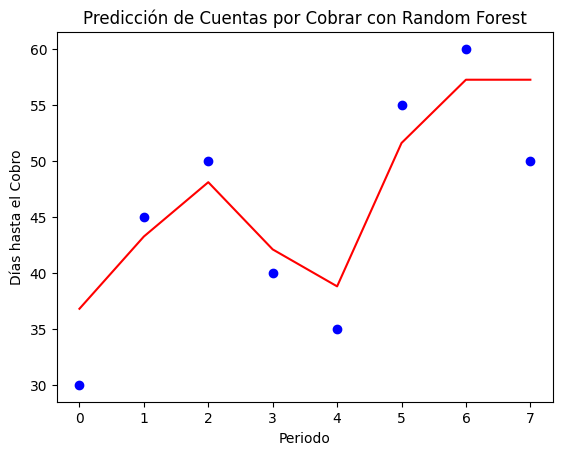

In [30]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Datos históricos de cuentas por cobrar (días hasta el cobro)
data = {
    'Periodo': ['Ene-2023', 'Feb-2023', 'Mar-2023', 'Abr-2023', 'May-2023', 'Jun-2023', 'Jul-2023', 'Ago-2023'],
    'Dias_Cobro': [30, 45, 50, 40, 35, 55, 60, 50]
}

df = pd.DataFrame(data)

# Transformar los periodos en valores numéricos
df['Periodo_Num'] = np.arange(len(df))

# Crear variables de entrenamiento y prueba
X = df[['Periodo_Num']]
y = df['Dias_Cobro']

# Dividir los datos en entrenamiento y prueba
X_train = X[:-1]
y_train = y[:-1]
X_test = X[-1:]
y_test = y[-1:]

# Inicializar y entrenar el modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Resultados
print(f"Predicción de días hasta el cobro para el próximo periodo: {y_pred[0]}")

# Visualización
plt.scatter(df['Periodo_Num'], df['Dias_Cobro'], color='blue')
plt.plot(df['Periodo_Num'], model.predict(X), color='red')
plt.xlabel('Periodo')
plt.ylabel('Días hasta el Cobro')
plt.title('Predicción de Cuentas por Cobrar con Random Forest')
plt.show()

In [29]:
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, value

# Datos
proveedores = ['Proveedor1', 'Proveedor2', 'Proveedor3']
costos_pago = {'Proveedor1': 1000, 'Proveedor2': 1200, 'Proveedor3': 1500}
dias_credito = {'Proveedor1': 30, 'Proveedor2': 45, 'Proveedor3': 60}
tasa_interes = 0.05  # 5% anual

# Definir el problema de optimización
modelo = LpProblem("Minimizar_Costos_Pago", LpMinimize)

# Variables de decisión: días hasta el pago
dias_hasta_pago = LpVariable.dicts("Dias_Hasta_Pago", proveedores, lowBound=0, upBound=60, cat='Integer')

# Función objetivo
modelo += lpSum(costos_pago[i] * (1 + tasa_interes / 365 * dias_hasta_pago[i]) for i in proveedores)

# Restricciones: no pagar antes del plazo de crédito
for i in proveedores:
    modelo += dias_hasta_pago[i] >= dias_credito[i]

# Resolver el problema
modelo.solve()

# Resultados
for v in modelo.variables():
    print(f"{v.name} = {v.varValue}")

print(f"Coste Total = {value(modelo.objective)}")

Dias_Hasta_Pago_Proveedor1 = 30.0
Dias_Hasta_Pago_Proveedor2 = 45.0
Dias_Hasta_Pago_Proveedor3 = 60.0
Coste Total = 3723.8356164383567


In [32]:
import numpy as np

# Datos ficticios históricos de 10 años
ingresos_historicos = [100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000]
costos_directos_historicos = [50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000]
costos_indirectos_historicos = [10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000]
gastos_administrativos_historicos = [5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500]
gastos_comercializacion_historicos = [2000, 2200, 2400, 2600, 2800, 3000, 3200, 3400, 3600, 3800]

# Calcular los flujos de caja históricos
flujos_caja_historicos = []
for i in range(10):
    ingresos = ingresos_historicos[i]
    costos_directos = costos_directos_historicos[i]
    costos_indirectos = costos_indirectos_historicos[i]
    gastos_administrativos = gastos_administrativos_historicos[i]
    gastos_comercializacion = gastos_comercializacion_historicos[i]
    utilidad_antes_impuestos = ingresos - costos_directos - costos_indirectos - gastos_administrativos - gastos_comercializacion
    impuestos = utilidad_antes_impuestos * 0.25  # Impuesto IUE del 25%
    flujo_caja = utilidad_antes_impuestos - impuestos
    flujos_caja_historicos.append(flujo_caja)

# Calcular el valor presente de los flujos de caja futuros
tasa_descuento = 0.1  # Tasa de descuento estándar del 10%
valor_presente = 0
for i in range(5):  # Proyectando flujos de caja para los próximos 5 años con un crecimiento estándar del 5%
    flujo_caja_futuro = flujos_caja_historicos[-1] * 1.05 ** (i + 1)
    valor_presente += flujo_caja_futuro / (1 + tasa_descuento) ** (i + 1)

# Valor terminal
tasa_crecimiento_perpetuo = 0.03  # Tasa de crecimiento perpetuo del 3%
valor_terminal = flujos_caja_historicos[-1] * 1.05 ** 6 / (tasa_descuento - tasa_crecimiento_perpetuo)
valor_presente += valor_terminal / (1 + tasa_descuento) ** 5

print(f"Valor de la empresa (valoración tradicional): {valor_presente:.2f}")

Valor de la empresa (valoración tradicional): 763929.47


In [36]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Crear un DataFrame con los datos históricos
datos = pd.DataFrame({
    'ingresos': ingresos_historicos,
    'costos_directos': costos_directos_historicos,
    'costos_indirectos': costos_indirectos_historicos,
    'gastos_administrativos': gastos_administrativos_historicos,
    'gastos_comercializacion': gastos_comercializacion_historicos
})

# Crear un modelo de Random Forest para predecir los ingresos futuros
X = datos.drop('ingresos', axis=1)
X.columns = ['costos_directos', 'costos_indirectos', 'gastos_administrativos', 'gastos_comercializacion']
y = datos['ingresos']
rf_ingresos = RandomForestRegressor()
rf_ingresos.fit(X, y)

# Predecir los ingresos futuros para los próximos 5 años
ingresos_futuros = []
for i in range(5):
    # Convertir el último registro en un DataFrame con nombres de columnas
    ultima_fila = X.iloc[-1].values.reshape(1, -1)
    ultima_fila_df = pd.DataFrame(ultima_fila, columns=X.columns)
    ingresos_futuros.append(rf_ingresos.predict(ultima_fila_df)[0])

    # Actualizar X e y con las nuevas predicciones
    X = pd.concat([X, ultima_fila_df], ignore_index=True)
    y = pd.concat([y, pd.Series(ingresos_futuros[-1])], ignore_index=True)
    rf_ingresos.fit(X, y)

# Calcular los flujos de caja futuros utilizando las predicciones de ingresos
flujos_caja_futuros = []
for i in range(5):
    ingresos = ingresos_futuros[i]
    costos_directos = costos_directos_historicos[-1] * 1.05 ** (i + 1)
    costos_indirectos = costos_indirectos_historicos[-1] * 1.05 ** (i + 1)
    gastos_administrativos = gastos_administrativos_historicos[-1] * 1.05 ** (i + 1)
    gastos_comercializacion = gastos_comercializacion_historicos[-1] * 1.05 ** (i + 1)
    utilidad_antes_impuestos = ingresos - costos_directos - costos_indirectos - gastos_administrativos - gastos_comercializacion
    impuestos = utilidad_antes_impuestos * 0.25
    flujo_caja = utilidad_antes_impuestos - impuestos
    flujos_caja_futuros.append(flujo_caja)

# Calcular el valor presente de los flujos de caja futuros
valor_presente_ml = 0
for i in range(5):
    valor_presente_ml += flujos_caja_futuros[i] / (1 + tasa_descuento) ** (i + 1)

# Valor terminal
tasa_crecimiento_perpetuo = 0.03
valor_terminal_ml = flujos_caja_futuros[-1] / (tasa_descuento - tasa_crecimiento_perpetuo)
valor_presente_ml += valor_terminal_ml / (1 + tasa_descuento) ** 5

print(f"Valor de la empresa (incorporando ML): {valor_presente_ml:.2f}")

Valor de la empresa (incorporando ML): 275621.53


In [2]:
pip install pymc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.6/872.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of arviz to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

Utilidad Neta Promedio en 5 años: $905,966.45
Intervalo de Confianza al 90%: $779,082.62 - $1,033,211.82


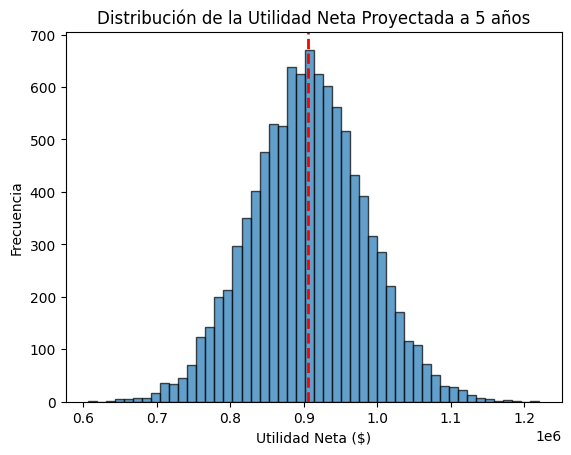

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos iniciales
ingresos_iniciales = 500000
costos_iniciales = 300000
gastos_generales = 50000
tasa_impuesto = 0.25
horizonte = 5
simulaciones = 10000

# Resultados de las simulaciones
resultados_utilidad_neta = []

for _ in range(simulaciones):
    ingresos = ingresos_iniciales
    costos = costos_iniciales
    utilidad_neta = 0

    for _ in range(horizonte):
        crecimiento_ingresos = np.random.normal(0.10, 0.02)
        incremento_costos = np.random.normal(0.08, 0.015)
        ingresos *= (1 + crecimiento_ingresos)
        costos *= (1 + incremento_costos)
        utilidad_bruta = ingresos - costos
        utilidad_operativa = utilidad_bruta - gastos_generales
        utilidad_neta_anual = utilidad_operativa * (1 - tasa_impuesto)
        utilidad_neta += utilidad_neta_anual

    resultados_utilidad_neta.append(utilidad_neta)

# Análisis de Resultados
utilidad_neta_promedio = np.mean(resultados_utilidad_neta)
intervalo_confianza = np.percentile(resultados_utilidad_neta, [5, 95])

print(f'Utilidad Neta Promedio en 5 años: ${utilidad_neta_promedio:,.2f}')
print(f'Intervalo de Confianza al 90%: ${intervalo_confianza[0]:,.2f} - ${intervalo_confianza[1]:,.2f}')

# Gráfico de Resultados
plt.hist(resultados_utilidad_neta, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(utilidad_neta_promedio, color='r', linestyle='dashed', linewidth=2)
plt.title('Distribución de la Utilidad Neta Proyectada a 5 años')
plt.xlabel('Utilidad Neta ($)')
plt.ylabel('Frecuencia')
plt.show()


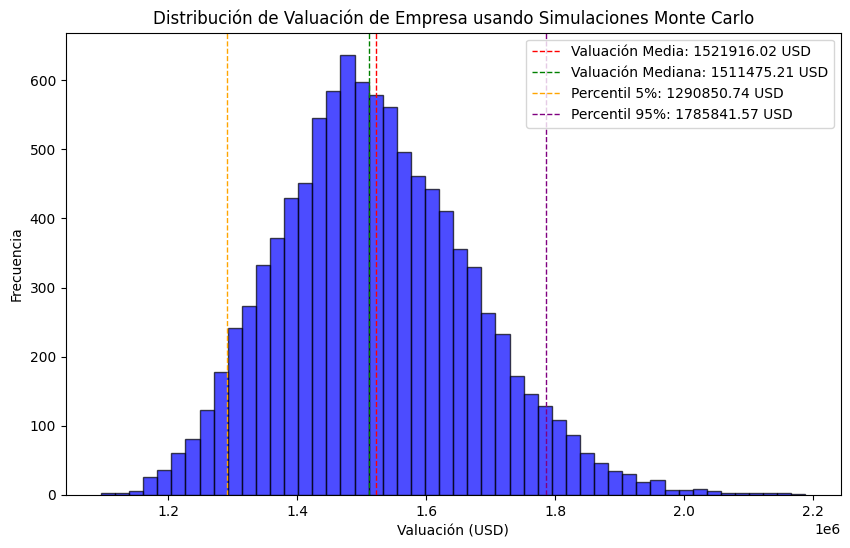

Valuación Media: 1521916.02 USD
Valuación Mediana: 1511475.21 USD
Percentil 5%: 1290850.74 USD
Percentil 95%: 1785841.57 USD


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generar nuevamente distribuciones de las variables de entrada para reproducir el ejemplo
np.random.seed(42)
n_simulations = 10000
growth_rate_sales = np.random.normal(0.10, 0.02, n_simulations)
growth_rate_costs = np.random.normal(0.05, 0.01, n_simulations)
wacc = np.random.normal(0.12, 0.01, n_simulations)

# Inicializar arrays para almacenar resultados de FCF y valuación
fcf = np.zeros(n_simulations)
valuation = np.zeros(n_simulations)

# Datos iniciales
sales_2023 = 700000
costs_2023 = 380000
capex = 50000
depreciation = 30000
tax_rate = 0.25
working_capital_ratio = 0.10

# Simulaciones Monte Carlo
for i in range(n_simulations):
    sales = sales_2023 * (1 + growth_rate_sales[i])
    costs = costs_2023 * (1 + growth_rate_costs[i])
    ebit = sales - costs
    taxes = ebit * tax_rate
    nopat = ebit - taxes
    change_in_working_capital = sales * working_capital_ratio
    fcf[i] = nopat + depreciation - capex - change_in_working_capital
    valuation[i] = fcf[i] / wacc[i]

# Calcular estadísticas descriptivas
mean_valuation = np.mean(valuation)
median_valuation = np.median(valuation)
percentile_5 = np.percentile(valuation, 5)
percentile_95 = np.percentile(valuation, 95)

# Crear el histograma de las valuaciones
plt.figure(figsize=(10,6))
plt.hist(valuation, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribución de Valuación de Empresa usando Simulaciones Monte Carlo')
plt.xlabel('Valuación (USD)')
plt.ylabel('Frecuencia')
plt.axvline(mean_valuation, color='red', linestyle='dashed', linewidth=1, label=f'Valuación Media: {mean_valuation:.2f} USD')
plt.axvline(median_valuation, color='green', linestyle='dashed', linewidth=1, label=f'Valuación Mediana: {median_valuation:.2f} USD')
plt.axvline(percentile_5, color='orange', linestyle='dashed', linewidth=1, label=f'Percentil 5%: {percentile_5:.2f} USD')
plt.axvline(percentile_95, color='purple', linestyle='dashed', linewidth=1, label=f'Percentil 95%: {percentile_95:.2f} USD')
plt.legend()

# Mostrar la gráfica
plt.show()

# Mostrar resultados
print(f"Valuación Media: {mean_valuation:.2f} USD")
print(f"Valuación Mediana: {median_valuation:.2f} USD")
print(f"Percentil 5%: {percentile_5:.2f} USD")
print(f"Percentil 95%: {percentile_95:.2f} USD")

In [8]:
import pandas as pd
import numpy as np

# Crear un rango de fechas trimestrales desde el año 2000 hasta 2024
dates = pd.date_range(start='2000-01-01', end='2024-01-01', freq='Q')

# Crear datos explícitos para cada variable
data = {
    'Date': dates,
    'Sales': [
        50000, 52000, 53000, 55000, 58000, 60000, 62000, 65000, 67000, 69000, 71000, 74000,
        76000, 78000, 81000, 83000, 85000, 87000, 89000, 92000, 94000, 96000, 99000, 101000,
        103000, 106000, 108000, 110000, 113000, 115000, 117000, 120000, 122000, 125000, 127000,
        130000, 132000, 135000, 137000, 140000, 143000, 145000, 148000, 150000, 153000, 155000,
        158000, 161000, 163000, 166000, 169000, 172000, 175000, 178000, 181000, 184000, 187000,
        190000, 193000, 196000, 199000, 202000, 205000, 208000, 211000, 214000, 217000, 220000,
        223000, 226000, 229000, 232000, 235000, 238000, 241000, 244000, 247000, 250000, 253000,
        256000, 259000, 262000, 265000, 268000, 271000, 274000, 277000, 280000, 283000, 286000,
        289000, 292000, 295000, 298000, 301000, 304000, 307000, 310000, 313000, 316000, 319000,
        322000
    ],
    'Costs': [
        30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000,
        42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000,
        54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000,
        66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000,
        78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000,
        90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000, 101000,
        102000, 103000, 104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000, 112000,
        113000, 114000, 115000, 116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000,
        124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000, 132000, 133000, 134000,
        135000
    ],
    'CAPEX': [
        5000, 5200, 5400, 5600, 5800, 6000, 6200, 6400, 6600, 6800, 7000, 7200,
        7400, 7600, 7800, 8000, 8200, 8400, 8600, 8800, 9000, 9200, 9400, 9600,
        9800, 10000, 10200, 10400, 10600, 10800, 11000, 11200, 11400, 11600, 11800, 12000,
        12200, 12400, 12600, 12800, 13000, 13200, 13400, 13600, 13800, 14000, 14200, 14400,
        14600, 14800, 15000, 15200, 15400, 15600, 15800, 16000, 16200, 16400, 16600, 16800,
        17000, 17200, 17400, 17600, 17800, 18000, 18200, 18400, 18600, 18800, 19000, 19200,
        19400, 19600, 19800, 20000, 20200, 20400, 20600, 20800, 21000, 21200, 21400, 21600,
        21800, 22000, 22200, 22400, 22600, 22800, 23000, 23200, 23400, 23600, 23800, 24000,
        24200, 24400, 24600, 24800, 25000, 25200, 25400, 25600, 25800, 26000, 26200, 26400,
        26600
    ],
    'Depreciation': [
        2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100,
        3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
        4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500,
        5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700,
        6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900,
        8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100,
        9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300,
        10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500,
        11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700,
        12800
    ],
    'Tax Rate': [
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
        0.25
    ],
    'Working Capital Ratio': [
        0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10,
        0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10,
        0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10,
        0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10,
        0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10,
        0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10,
        0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10,
        0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10,
        0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10,
        0.10
    ]
}

# Crear un DataFrame con los datos
df = pd.DataFrame(data)


ValueError: All arrays must be of the same length

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separar datos en entrenamiento y prueba
train = df[df['Date'] < '2024-01-01']
future_dates = pd.date_range(start='2024-04-01', end='2029-01-01', freq='Q')
future_df = pd.DataFrame({'Date': future_dates})

# Función para entrenar y predecir valores futuros
def predict_future_values(variable):
    X = np.array(range(len(train))).reshape(-1, 1)
    y = train[variable].values
    model = LinearRegression()
    model.fit(X, y)
    future_X = np.array(range(len(train), len(train) + len(future_dates))).reshape(-1, 1)
    future_df[variable] = model.predict(future_X)

# Predecir valores futuros para cada variable
for variable in ['Sales', 'Costs', 'CAPEX', 'Depreciation', 'Tax Rate', 'Working Capital Ratio']:
    predict_future_values(variable)

# Combinar datos históricos y futuros
full_df = pd.concat([df, future_df], ignore_index=True)


NameError: name 'df' is not defined